In [11]:
from environment.models.simple import SimpleEnv

import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

env = SimpleEnv()


2024-03-20 09:48:46.429525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 09:48:46.602359: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


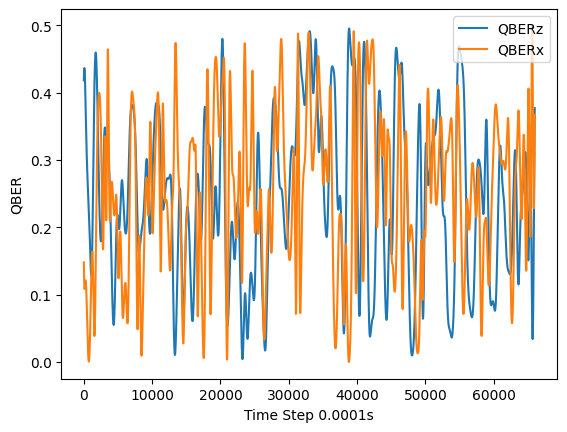

In [25]:
env.simulate(reset=False)

QBER = env.get_QBER()
PHI = env.get_phi()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

In [26]:
split = .8
train_test_margin = .1
# Split the data into training and testing sets
phi_train = PHI[:int(len(PHI)*split)]
phi_test = PHI[int(len(PHI)*(split-train_test_margin)):]

QBERs_train = QBER[:int(len(QBER)*split)]
QBERs_test = QBER[int(len(QBER)*(split-train_test_margin)):]

In [39]:
# define how many variables
num_inputs = 2

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(num_inputs,)),
    # keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(12, activation='linear')
])
model.compile(optimizer=keras.optimizers.Adam(), loss='mean_squared_error')

# Train the neural network
model.fit(QBERs_train[:,:], phi_train[:,:12], epochs=60)

# Predict the QBER using the trained neural network
phi_preds = model.predict(QBERs_test[:,:])

# Convert the predicted_phi_move to a numpy array
phi_preds = np.array(phi_preds)

Epoch 1/60


1651/1651 [==============================] - 3s 2ms/step - loss: 1.7484
Epoch 2/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.6780
Epoch 3/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.6309
Epoch 4/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.5977
Epoch 5/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.5745
Epoch 6/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.5560
Epoch 7/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.5422
Epoch 8/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.5315
Epoch 9/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.5209
Epoch 10/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.5089
Epoch 11/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.4976
Epoch 12/60
1651/1651 [==============================] - 3s 2ms/step - loss: 1.4885
Epoch 13/60


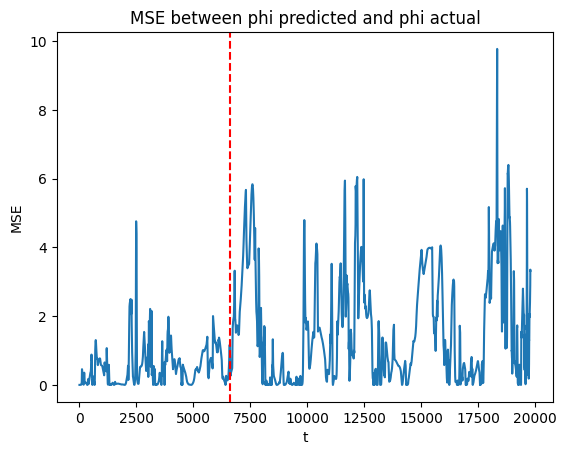

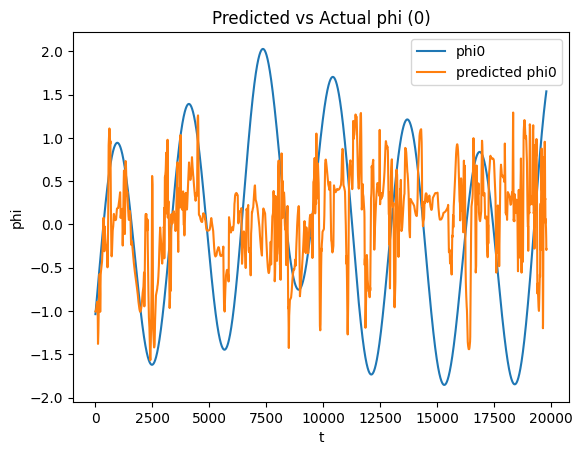

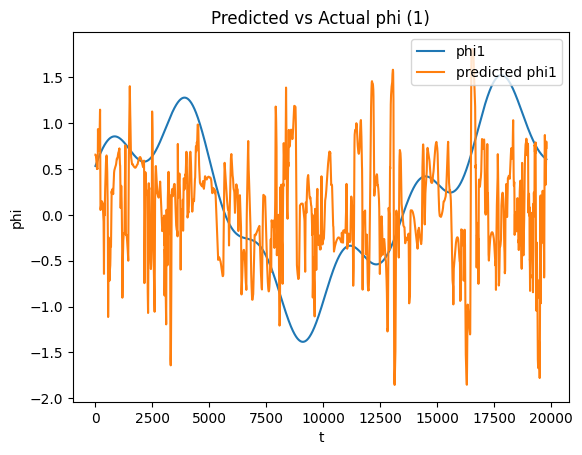

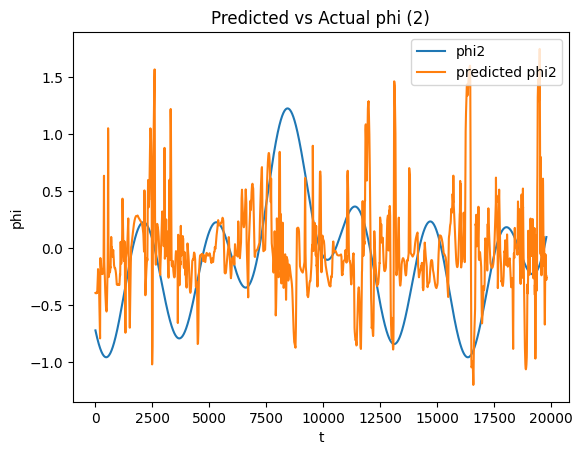

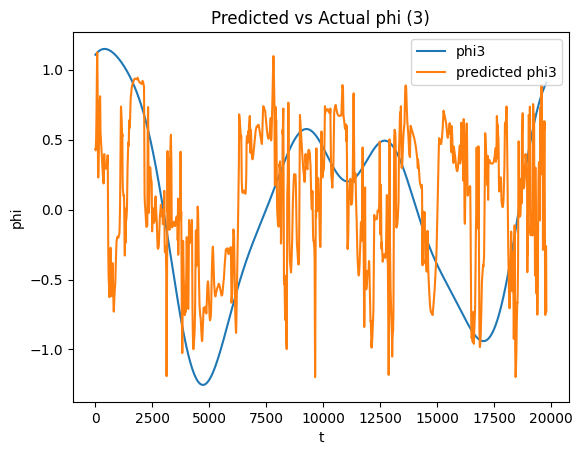

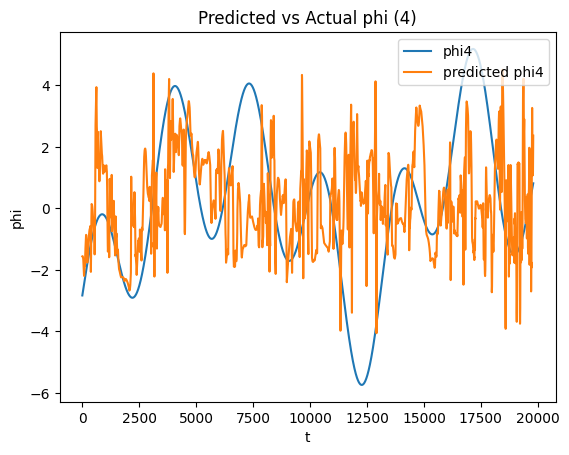

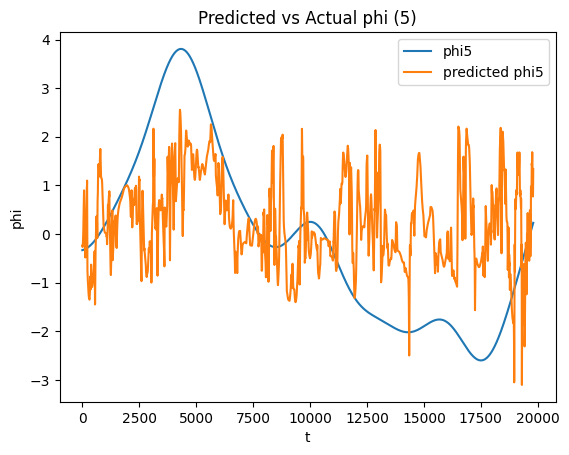

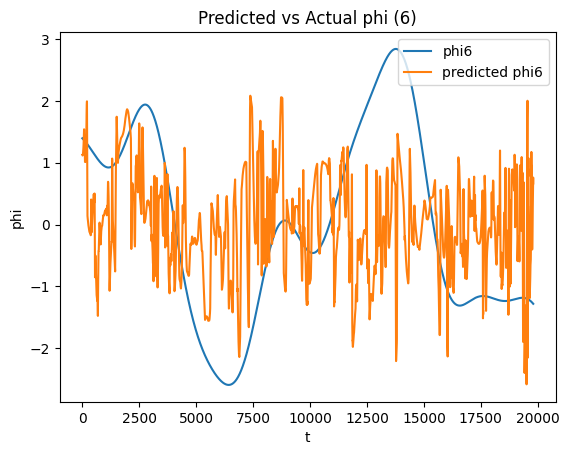

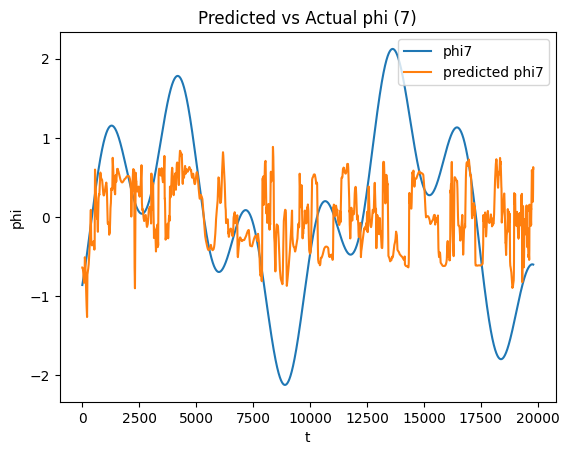

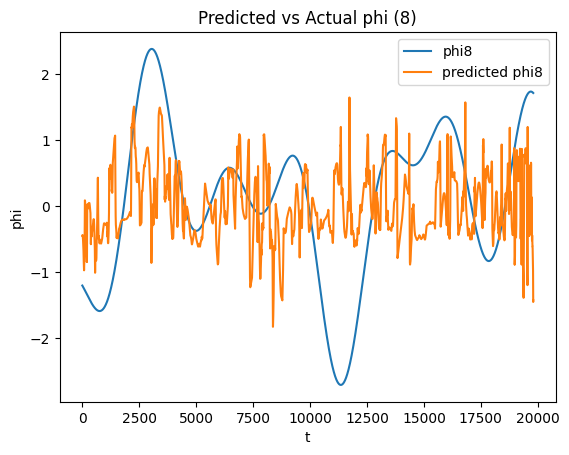

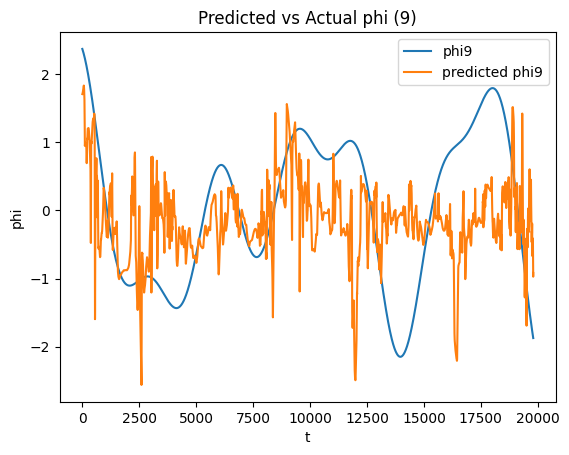

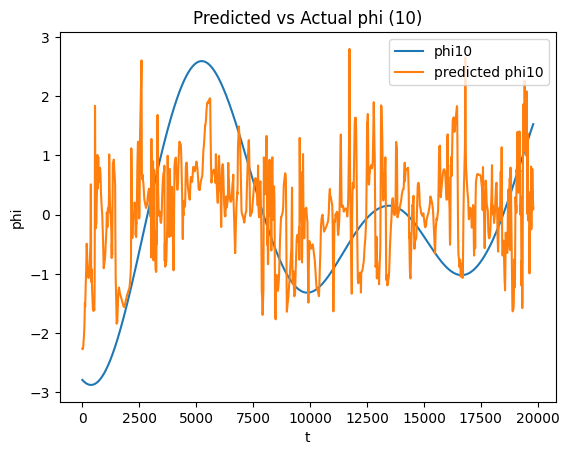

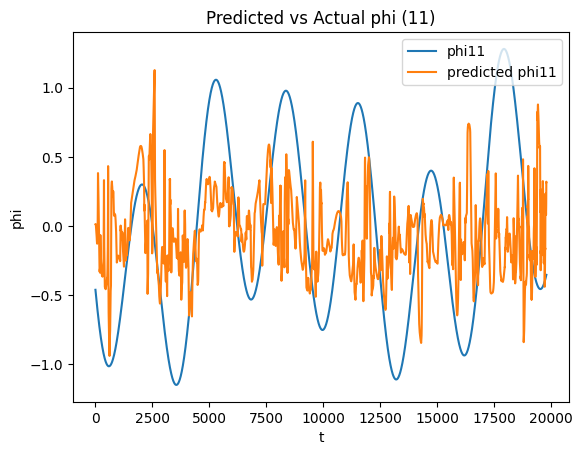

In [41]:
# Plot the MSE
mse_values = []

for i in range(len(phi_preds)):
    mse = np.mean((phi_preds[i][0] - phi_test[i][0]) ** 2)
    mse_values.append(mse)

plt.plot(mse_values)
plt.axvline(x=len(PHI) * 0.1, color='red', linestyle='--')
plt.xlabel('t')
plt.ylabel('MSE')
plt.title('MSE between phi predicted and phi actual')
plt.show()

phi_plot = np.array(PHI)
phi_test = np.array(phi_test)
phi_preds = np.array(phi_preds)
# # Plot the predicted and actual phi
for i in range(12):
    # plt.axvline(x=len(phi_plot) * 0.1, color='red', linestyle='--')
    plt.plot(phi_test[:,i], label=f'phi{i}')
    plt.plot(phi_preds[:,i], label=f'predicted phi{i}')
    plt.xlabel('t')
    plt.ylabel('phi')
    plt.legend(loc='upper right')
    plt.title(f'Predicted vs Actual phi ({i})')
    plt.show()